In [1]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [4]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [5]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

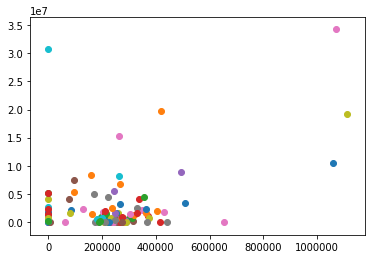

In [6]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [25]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
pred = km.fit_predict(finance_features)

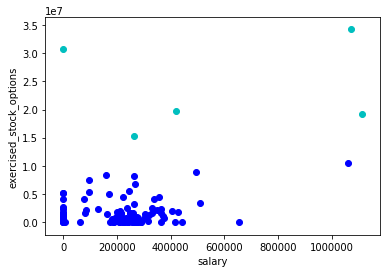

In [9]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

In [12]:
feature_3 = "total_payments"
poi = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

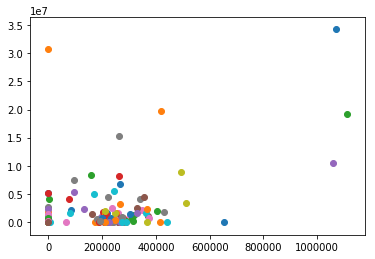

In [24]:
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2)
plt.show()

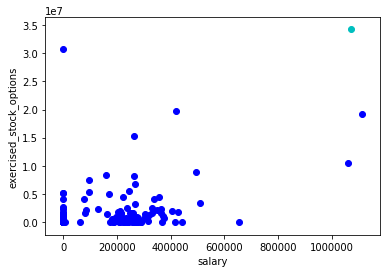

In [26]:
pred = km.fit_predict(finance_features)

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

In [29]:
from operator import itemgetter

names = []
ex_stock_op = []

for key in data_dict.keys():
    if(data_dict[key]['exercised_stock_options']!='NaN'):
        names.append(key)
        ex_stock_op.append(data_dict[key]['exercised_stock_options'])

l = list(zip(names, ex_stock_op))
l = sorted(l, key = itemgetter(1))
sorted(l, key = itemgetter(1))[0], sorted(l, key = itemgetter(1))[-1]

(('BELFER ROBERT', 3285), ('LAY KENNETH L', 34348384))

In [42]:
min(l, key=itemgetter(1))[1], max(l, key=itemgetter(1))[1]

(3285, 34348384)

In [43]:
names = []
salaries = []

for key in data_dict.keys():
    if(data_dict[key]['salary']!='NaN'):
        names.append(key)
        salaries.append(data_dict[key]['salary'])

l = list(zip(names, salaries))
min(l, key=itemgetter(1))[1], max(l, key=itemgetter(1))[1]

(477, 1111258)

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ex_stock_ = scaler.fit_transform(numpy.array(ex_stock_op).reshape(len(ex_stock_op),1))
sal_ = scaler.fit_transform(numpy.array(salaries).reshape(len(salaries),1))

C:\Users\gowdhaman.jayavel\AppData\Local\Continuum\anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [77]:
scaler.fit(numpy.array(salaries).reshape(len(salaries),1)).transform(numpy.array([[200000.0]]))

C:\Users\gowdhaman.jayavel\AppData\Local\Continuum\anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.17962407]])

In [80]:
scaler.fit(numpy.array(ex_stock_op).reshape(len(ex_stock_op),1)).transform(numpy.array([[1000000.0]]))

C:\Users\gowdhaman.jayavel\AppData\Local\Continuum\anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.02902059]])

In [81]:
from_msgs = []

for key in data_dict.keys():
    if(data_dict[key]['from_messages']!='NaN'):
        from_msgs.append(data_dict[key]['from_messages'])

min(from_msgs), max(from_msgs)

(12, 14368)

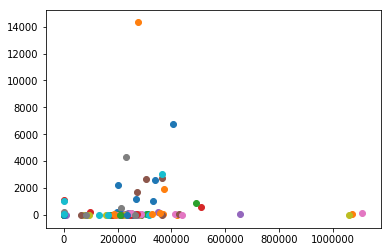

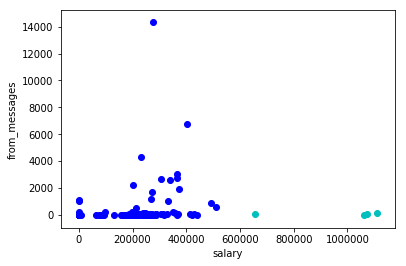

In [82]:
feature_1 = "salary"
feature_2 = "from_messages"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

km = KMeans(n_clusters=2, random_state=0)
pred = km.fit_predict(finance_features)

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")